In [1]:
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
import pandas as pd #type: ignore
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Theoretical

In [2]:
def cutoff_f(R, C):
    return 1/(2*np.pi*R*C)

def Vout_Th_Low_Pass(f, R, C, Vin):
    denominetor = np.sqrt(4 * np.pi**2 * f**2 * R**2 * C**2 + 1)
    return 1/denominetor * Vin

def Vout_Th_High_Pass(Fr, R, C, Vin = 6):
    Xc = 1/(2 * np.pi * Fr * C)
    vout = R/np.sqrt(R**2 + Xc**2) * Vin
    return vout

In [3]:
def Plot_Theoretical(frequency, Vout, Vin, fc, text, flag):
    gain_dB = 20 * np.log10(Vout/Vin)

    plt.figure(figsize=(7, 4))

    #main curve
    plt.plot(frequency, gain_dB, zorder = 3, lw = 2)

    #horizontal
    plt.hlines([max(gain_dB), max(gain_dB) - 3], frequency[flag], fc + flag * 5000, linestyles= '--', color = 'black', lw = 1)
    plt.plot([fc, fc], [min(gain_dB), max(gain_dB)], linestyle = '--', lw = 1, zorder = 2)

    plt.text(fc, min(gain_dB) - 1, r"$f_c$", fontsize = 14)
    plt.text(fc + flag * fc * 0.6, max(gain_dB) - 2, r"$-3 dB$", fontsize = 11)

    plt.xscale('log')
    plt.grid(True, zorder = -1)
    plt.grid(which='both',axis='x', linestyle='--', linewidth=0.7)
    plt.xlabel('Frequency (Hz)', fontsize = 12)
    plt.ylabel('Gain (dB)', fontsize = 12)
    plt.title(f'{text} Filter Frequency Response', fontsize = 14)
    plt.minorticks_on()
    ax = plt.gca()
    ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))

    plt.savefig(f'{text} Theoretical Graph.png', bbox_inches = 'tight', dpi = 600)
    plt.show()

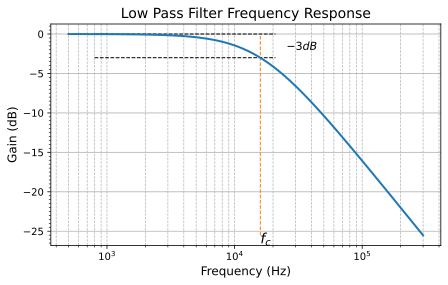

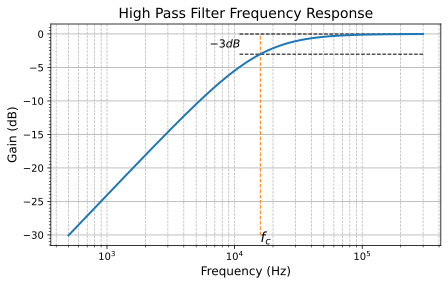

In [4]:
V_in = 6
R = 1E+3
C = 10*1E-9
fc = cutoff_f(R, C)
frequency = np.linspace(500, 300000, 1000)

Plot_Theoretical(frequency, Vout_Th_Low_Pass(frequency, R, C, V_in), V_in, fc, 'Low Pass', 1)
Plot_Theoretical(frequency, Vout_Th_High_Pass(frequency, R, C, V_in), V_in, fc, 'High Pass', -1)

In [5]:
def Vout_Th_Band_Pass(f, R1, C1, R2, C2, Vin):
    numerator = 2 * np.pi * f * R1 * C1
    denominator = np.sqrt((1 + (2 * np.pi * f * R2 * C2)**2) * (1 + (2 * np.pi * f * R1 * C1)**2))
    Vo = numerator / denominator * Vin
    return Vo

In [6]:
# Given component values
R1 = 1e3  # 1k ohm
C1 = 10e-9  # 10 nF
R2 = 100  # 100 ohm
C2 = 10e-9  # 10 nF
Vin = 6
fL = cutoff_f(R1, C1)
fH = cutoff_f(R2, C2)
print(C1)

1e-08


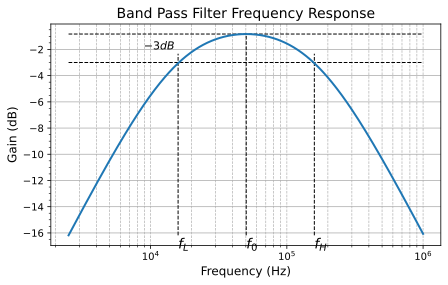

In [7]:
# Frequency range (logarithmic scale for better visualization)
frequencies = np.linspace(2500, 1000000, 5000)  # from 10 Hz to 1 MHz
Vo = Vout_Th_Band_Pass(frequencies, R1, C1, R2, C2, Vin)

# Plotting the response
gain_dB = 20 * np.log10(Vo/Vin)
plt.figure(figsize=(7, 4))
plt.plot(frequencies, gain_dB, zorder = 3, lw = 2)  # Plot in dB

plt.vlines([fL, fH], min(gain_dB), max(gain_dB) - 1.5, linestyle = '--', color = 'black', zorder = 2, lw = 1) #vertical

f0 = np.sqrt(fH * fL)
plt.plot([f0, f0], [min(gain_dB), max(gain_dB)], linestyle = '--', color = 'black', zorder = 2, lw = 1) #vertical

plt.hlines([max(gain_dB), - 3], frequencies[0], frequencies[-1], linestyle = '--', color = 'black', zorder = 2, lw = 1) #horizontal

#test
plt.text(fL, min(gain_dB) - 1, r"$f_L$", fontsize = 14)
plt.text(fH, min(gain_dB) - 1, r"$f_H$", fontsize = 14)
plt.text(f0, min(gain_dB) - 1, r"$f_0$", fontsize = 14)
plt.text(fL- 7000, - 2, r"$-3 dB$", fontsize = 11)

plt.minorticks_on()
ax = plt.gca()
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))
plt.title('Band Pass Filter Frequency Response', fontsize = 14)
plt.xlabel('Frequency (Hz)', fontsize = 12)
plt.ylabel('Gain (dB)', fontsize = 12)
plt.grid(True)
plt.grid(which='both', linestyle='--', axis= 'x', linewidth=0.7)
plt.xscale('log')  # Logarithmic scale for frequency

plt.savefig('Band Pass Theoretical Graph.png', bbox_inches = 'tight', dpi = 600)
plt.show()

### Experimental

In [32]:
def dataframe(text):
    df = pd.read_excel("Data.xlsx", sheet_name=text)
    df.notna()
    return df

def smooth(df, text):
    df['Gain'] = 20 * np.log10(df['Vo']/6)
    df['Gain_smoothed'] = df['Gain'].rolling(window=3).mean()
    if text == 'Low Pass':
        df['Gain_smoothed'] = df['Gain_smoothed'].fillna(df['Gain_smoothed'][3])
    return df

In [44]:
def Plot_Experimental(df, text):
    plt.figure(figsize=(10, 6))
    plt.plot(df['Fr'], df['Gain_smoothed'], zorder = 3, lw = 2)
    plt.hlines([max(df['Gain_smoothed'][3:]), max(df['Gain_smoothed'][3:]) - 3], min(df['Fr']), max(df['Fr']), linestyles='--', lw = 1, color = 'black')

    plt.xlabel('Frequency (Hz)', fontsize = 12)
    plt.ylabel('Gain (dB)', fontsize = 12)
    plt.title(f'{text} Filter Frequency Response Experimental', fontsize = 14)
    
    plt.xscale('log')
    plt.grid(True, zorder = 0)
    plt.grid(which='both',axis='x', linestyle='--', linewidth=0.7)
    plt.minorticks_on()
    ax = plt.gca()
    ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))

    plt.savefig(f'{text} Experimental Graph.png', bbox_inches = 'tight', dpi = 600)
    plt.show()

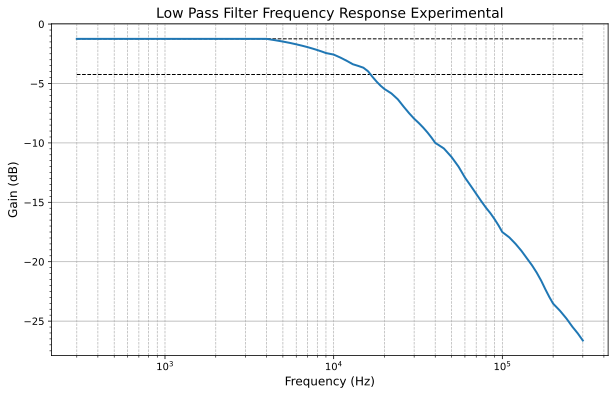

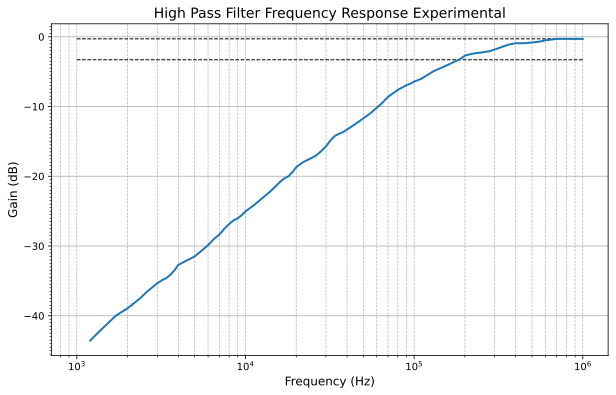

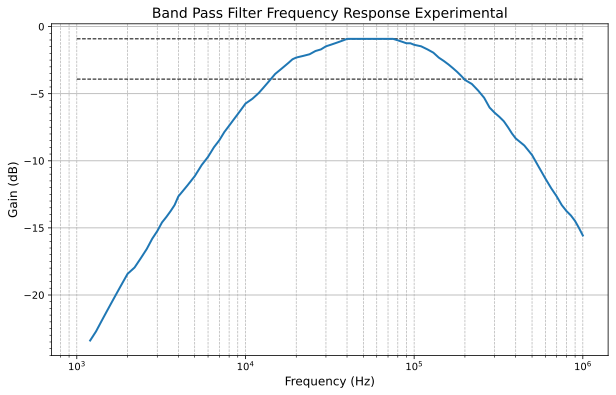

In [45]:
for key in ['Low Pass', 'High Pass', 'Band Pass']:
    df = dataframe(key)
    df = smooth(df, key)
    Plot_Experimental(df, key)